In [1]:
#!/usr/bin/env python

In [2]:
from scipy.integrate import quad 
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp as ē
from numpy import log as ln
from numpy import genfromtxt
from numpy import mean
from scipy.stats import norm

In [3]:
X1 = genfromtxt('age_met_married_female.csv', delimiter=',')
X2 = genfromtxt('age_met_married_males.csv', delimiter=',')
X3 = genfromtxt('age_met_dating_males.csv', delimiter=',')

This way of implementation is easy to understand the code<br>
but very slow, there is a faster way. 

In [4]:
def p(x, data, σ): 
	kde_sum = 0
	for μᵢ in data:
		kde_sum += norm.pdf(x, μᵢ, σ)
	return kde_sum/len(data)

In [5]:
def p1(x): return p(x, X1, 1.6)
def p2(x): return p(x, X2, 1.6)
def p3(x): return p(x, X3, 3)

These plots show that KDE does a good job finding p(x)

In [6]:
x = np.linspace(0, 80, 100)

In [7]:
plt.figure(figsize=(11,4))
plt.subplot(131)
y = p1(x)
plt.hist(X1, density=True, bins=30, alpha=0.7)
plt.plot(x,y)
plt.title('Married females')

Text(0.5, 1.0, 'Married females')

In [8]:
plt.subplot(132)
y = p2(x)
plt.hist(X2, density=True, bins=20, alpha=0.7)
plt.plot(x,y)
plt.title('Married males')

Text(0.5, 1.0, 'Married males')

In [9]:
plt.subplot(133)
y = p3(x)
plt.hist(X3, density=True, bins=30, alpha=0.7)
plt.plot(x,y)
plt.title('Dating Male')

Text(0.5, 1.0, 'Dating Male')

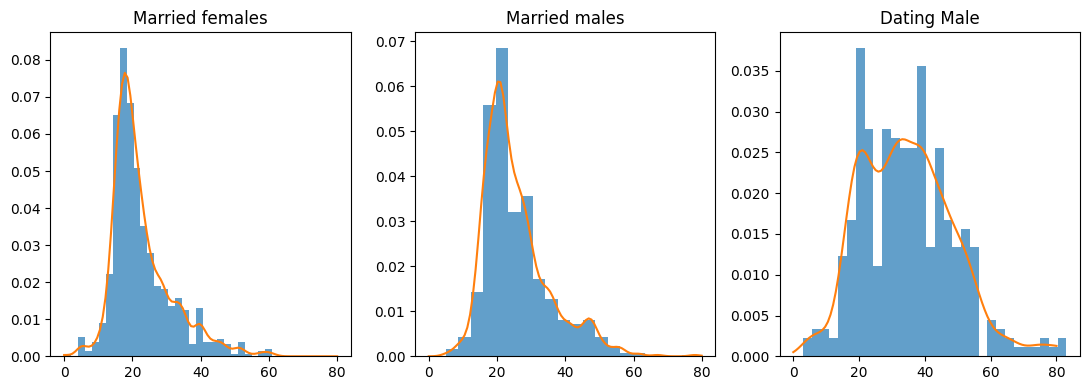

In [10]:
plt.tight_layout()
plt.show()

The KL divergence between p1, p2 is approximately	

In [11]:
def KL12(x): return p1(x)*ln(p1(x)/p2(x))
def KL13(x): return p1(x)*ln(p1(x)/p3(x))

For sampling

In [12]:
def KL12_sampling(x): return ln(p1(x)/p2(x))
def KL13_sampling(x): return ln(p1(x)/p3(x))

In [13]:
kl_12, err = quad(KL12, 0, 80) 
kl_13, err = quad(KL13, 0, 80) 

In [14]:
kl_12_sampling = mean(KL12_sampling(X1))
kl_13_sampling = mean(KL13_sampling(X1))

The approximation is close but not exact<br>
Notice that KL(p1,p2) < KL(p1,p3)

In [15]:
print('With Numpy Integration : Notice that %.3f < %.3f'%(kl_12, kl_13))
print('With Sampling Approximation : Notice that %.3f < %.3f'%(kl_12_sampling, kl_13_sampling))

With Numpy Integration : Notice that 0.082 < 0.521
With Sampling Approximation : Notice that 0.100 < 0.552


This is the faster way to implement KDE as written by TA John Henry